# Методы оптимизации
## Лабораторная работа № 1
### Методы минимизации функции одной переменной

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import seaborn as sns
sns.set()
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [6]:
funcs = [(lambda x: x**3 - 3*np.sin(x),[0,1]),
            (lambda x: x**4 + x**2 + x + 1,[-1,0]),
            (lambda x: np.exp(x) + 1/x,[-1,0]),
            (lambda x: x**2 - 2*x + np.exp(-x),[-1,1.5]),
            (lambda x: x*np.sin(x) + 2*np.cos(x),[-6,-4]),
            (lambda x: x + 1/(x**2),[1,2]),
            (lambda x: 10*x*np.log(x) - (x**2)/2,[0.1,1]),
            (lambda x: np.exp(x) - (x**3)/3 + 2*x,[-2.5,-1]),
            (lambda x: x**2 - 2*x - 2*np.cos(x),[-0.5,1]),]

def select_function(n):
    return funcs[n-1]

In [83]:
# для тестирования методов
def test_func(func,args=None,n=2,eps=10**-5):
    sns.set_context("poster")
    f,bounds = select_function(n)
    x = np.linspace(bounds[0],bounds[1],1000)
    
    plt.plot(x,f(x))
    plt.xlabel('x')
    plt.ylabel('y')
    
    if args:
        x,y,n = func(f,bounds,eps=eps,**args)
    else:
        x,y,n = func(f,bounds,eps=eps)
    plt.scatter(x,y,color='red')
    print(int(x/eps)*eps,int(y/eps)*eps,n)


#### Метод перебора

c:\users\lainys\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


-0.38545 0.78519 100000


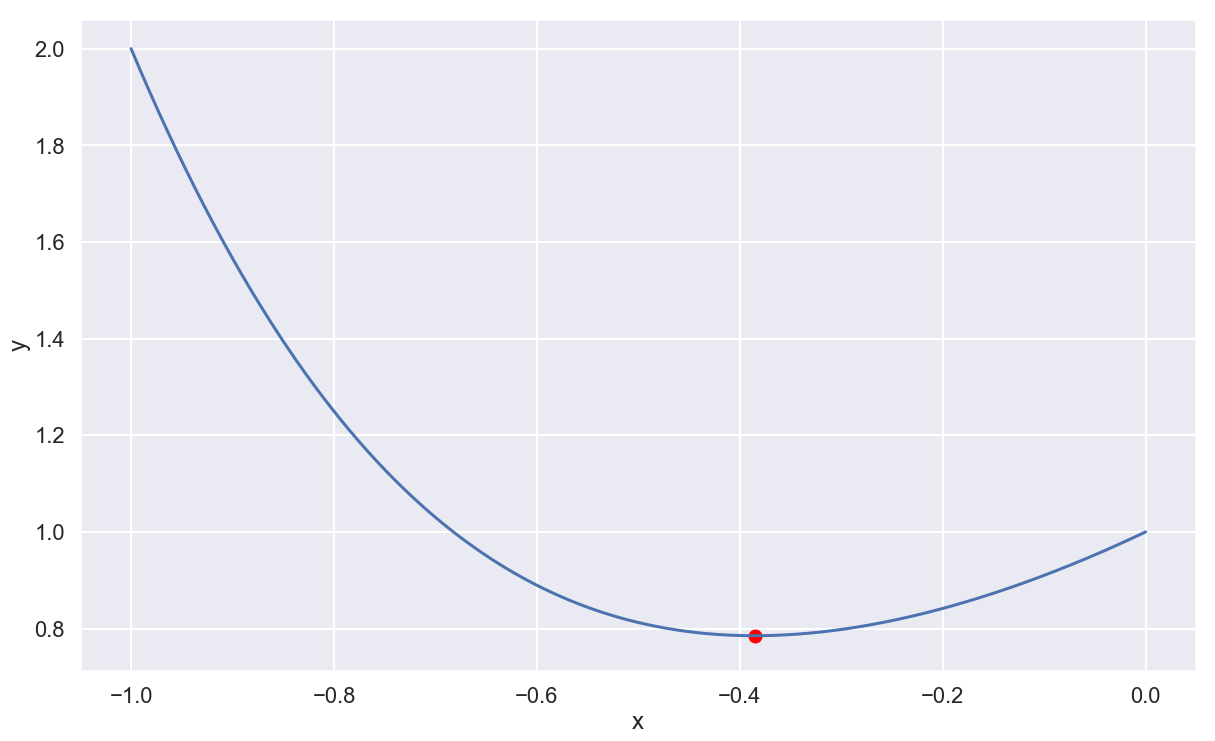

In [84]:
def bust(f,bounds,eps=0.0001):
    a,b = bounds
    n = np.ceil((b-a)/eps)
    x = np.linspace(a,b,n)
    y = f(x)
    m = np.argmin(y)
    return x[m],y[m],len(x)

test_func(bust)

#### Метод поразрядного поиска

-0.38545 0.78519 40


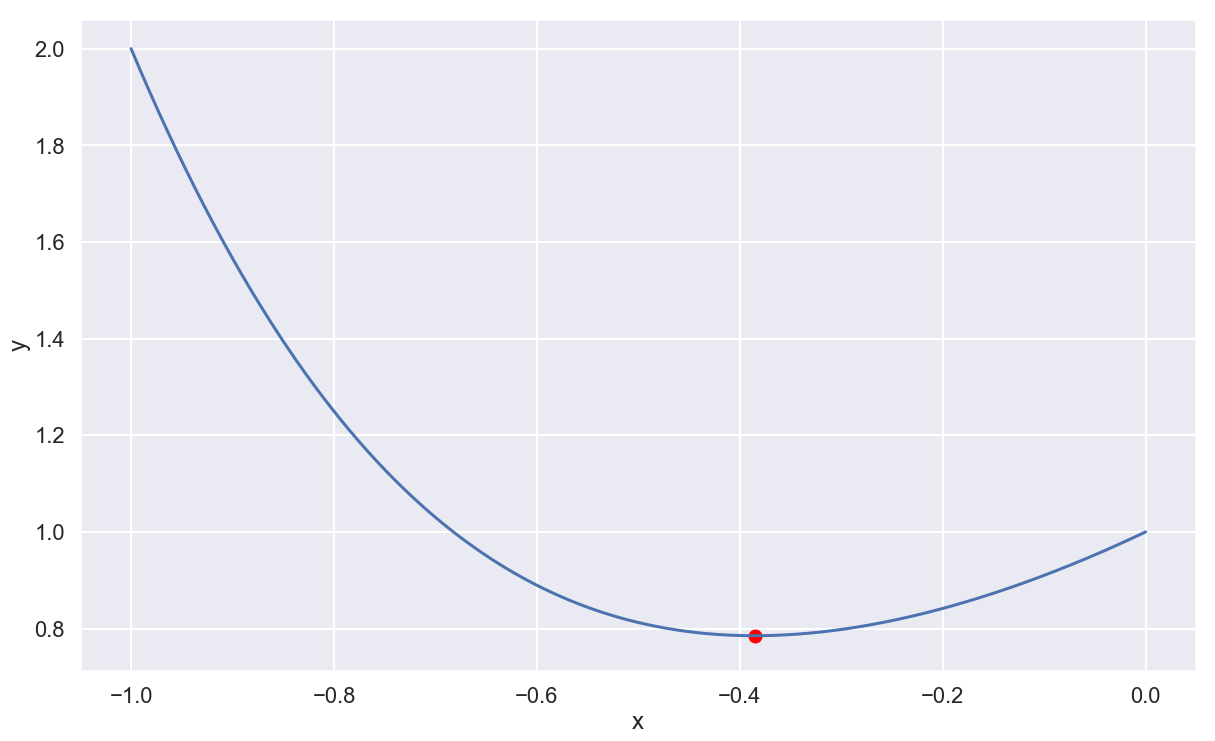

In [85]:
def iteration_striking_search(f,x,delta,f1,n=1):
    x += delta
    f2 = f(x)
    n += 1
    
    while f2 < f1:
        f1 = f2
        x += delta
        f2 = f(x)
        n += 1
        
    return x,f2,n
    

def striking_search(f,bounds,delta=0.25,eps=0.00001,eta=-4):
    a,b=bounds
    
    x = a
    f2 = f(x)
    n = 1
    
    while not np.abs(delta*eta) < eps:    
        x,f2,n = iteration_striking_search(f,x,delta,f2,n)
        
        delta /= eta
    
    return x-delta*eta,f2,n

test_func(striking_search)

#### Метод дихотомии

-0.38545 0.78519 34


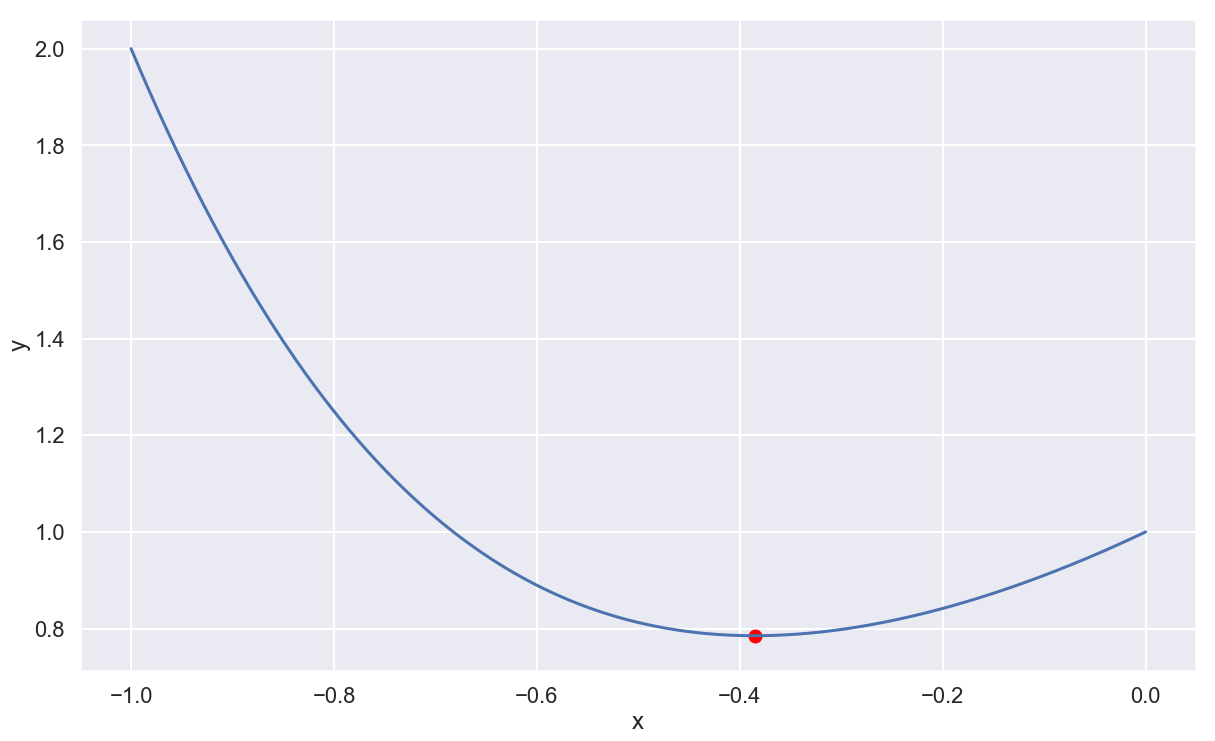

In [86]:
def iteration_dichotomy(f,a,b,delta,n=0):
    x1,x2 = (a + b - delta)/2,(a + b + delta)/2
    f1,f2 = f(x1),f(x2)
    
    if f1 <= f2:
        b = x2
    else:
        a = x1
    return a,b,n+2,(b-a)/2

def dichotomy(f,bounds,eps=0.00001,delta=0):
    if not (delta > 0 and delta < 2*eps):
        delta = eps
        
    a,b = bounds
    
    a,b,n,en = iteration_dichotomy(f,a,b,delta)
    
    while not en < eps:
        a,b,n,en = iteration_dichotomy(f,a,b,delta,n)
    
    x = (a+b)/2
    return x,f(x),n
        
    
test_func(dichotomy)

#### Метод золотого сечения

-0.38546 0.78519 25


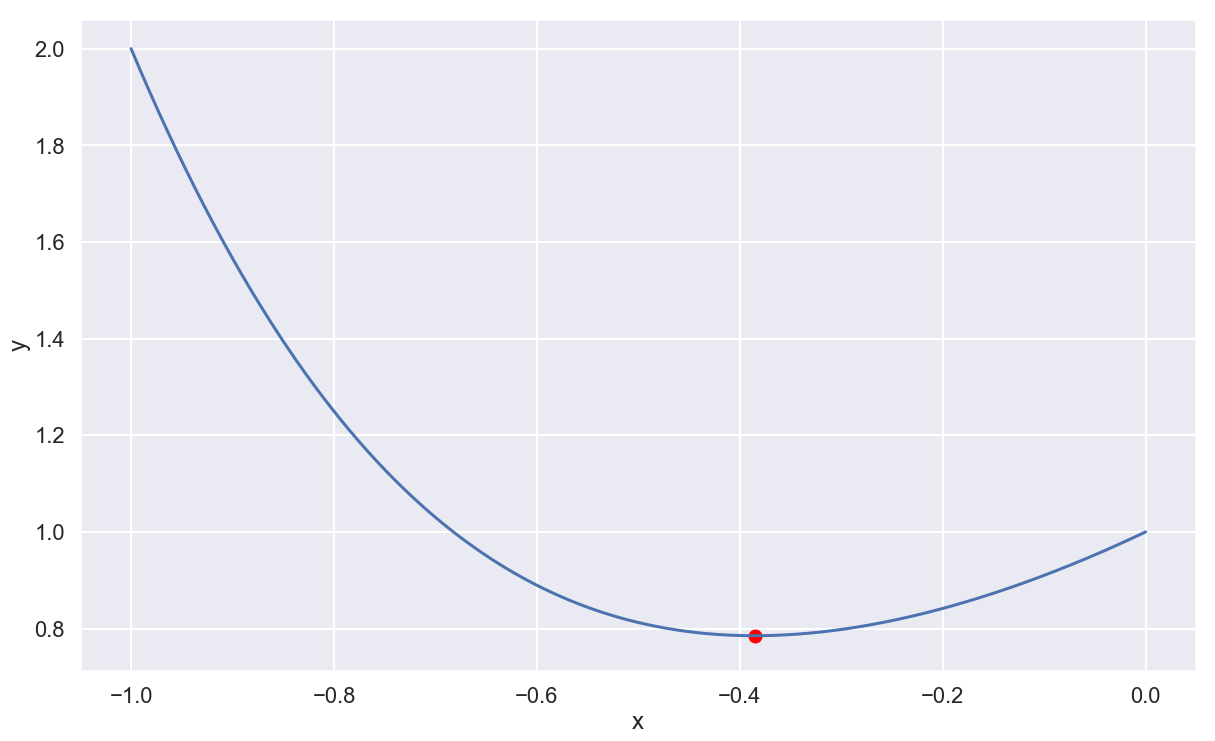

In [87]:
def iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n=0):
   
    if f1 <= f2:
        #b,x2,f2,x1 = x2,x1,f1,(b - (1 - t)*(b-a))
        b,x2,f2 = x2,x1,f1
        x1 = b - t*(b-a)
        f1 = f(x1)
    else:
        #a,x1,f1,x2 = x1,x2,f2,(b - t*(b-a))
        a,x1,f1 = x1,x2,f2
        x2 = b - (1 - t)*(b-a)
        f2 = f(x2)
    
    n += 1
    
    return a,b,x1,x2,f1,f2,n
   
    
def golden_section(f,bounds,eps=0.001):
    a,b = bounds
    
    t = (np.sqrt(5) - 1)/2
    
    x1 = a + (1 - t)*(b - a)
    x2 = a + (t)*(b - a)
    
    f1 = f(x1)
    f2 = f(x2)
    n = 2
    
    #a,b,x1,x2,f1,f2,n = iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n)
    
    en = (b-a)/2
    
    while not en < eps:
        a,b,x1,x2,f1,f2,n = iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n)
        en *= t
    
    x = (a + b)/2
    
    return x,f(x),n
    

test_func(golden_section)

#### Метод парабол

-0.38545 0.78519 11


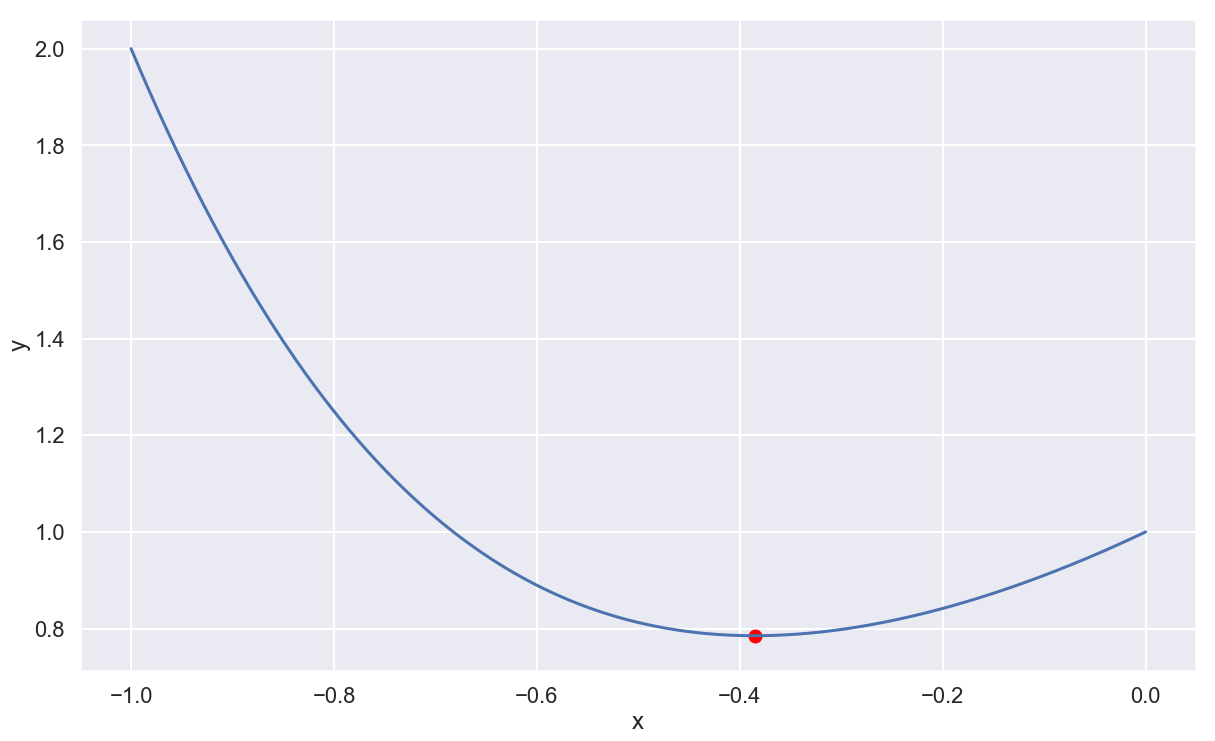

In [88]:
def iteration_parabola(f,x1,x2,x3,f1,f2,f3,n=0):
    
    a1 = (f2-f1)/(x2-x1)
    a2 = ((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
    
    x = (x1 + x2 - a1/a2)/2
    fx = f(x)
    n += 1
    
    if x > x2 and fx > f2:
        x3,f3 = x,fx
    elif x > x2 and fx < f2:
        x1,f1 = x2,f2
        x2,f2 = x,fx
    elif x < x2 and fx > f2:
        x1,f1 = x,fx
    elif x < x2 and fx < f2:
        x3,f3 = x2,f2
        x2,f2 = x,fx
        
    return x,x1,x2,x3,f1,f2,f3,n
    
def parabola(f,bounds,eps=0.001,n=0):
    a,b = bounds
    
    x1,x2,x3 = a,(a+b)/2,b
    f1,f2,f3 = f(x1),f(x2),f(x3)
    n += 3
    
    x0,x1,x2,x3,f1,f2,f3,n = iteration_parabola(f,x1,x2,x3,f1,f2,f3,n)
    
    delta = 1
    
    while not delta < eps:
        x,x1,x2,x3,f1,f2,f3,n = iteration_parabola(f,x1,x2,x3,f1,f2,f3,n)
        
        delta = np.abs(x0 - x)
        
        x0 = x
        
    return x0,f(x0),n

test_func(parabola)
    

In [89]:
# центральная
def cf(f,x,h=0.001):
    return (f(x+h)-f(x-h))/(2*h)

# вторая
def cff(f,x,h=0.001):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

# левая
def lf(f,x,h=0.001):
    return (f(x)-f(x-h))/h

# правая
def rf(f,x,h=0.001):
    return (f(x+h)-f(x))/h

#### Метод средней точки

-0.38545 0.78519 17


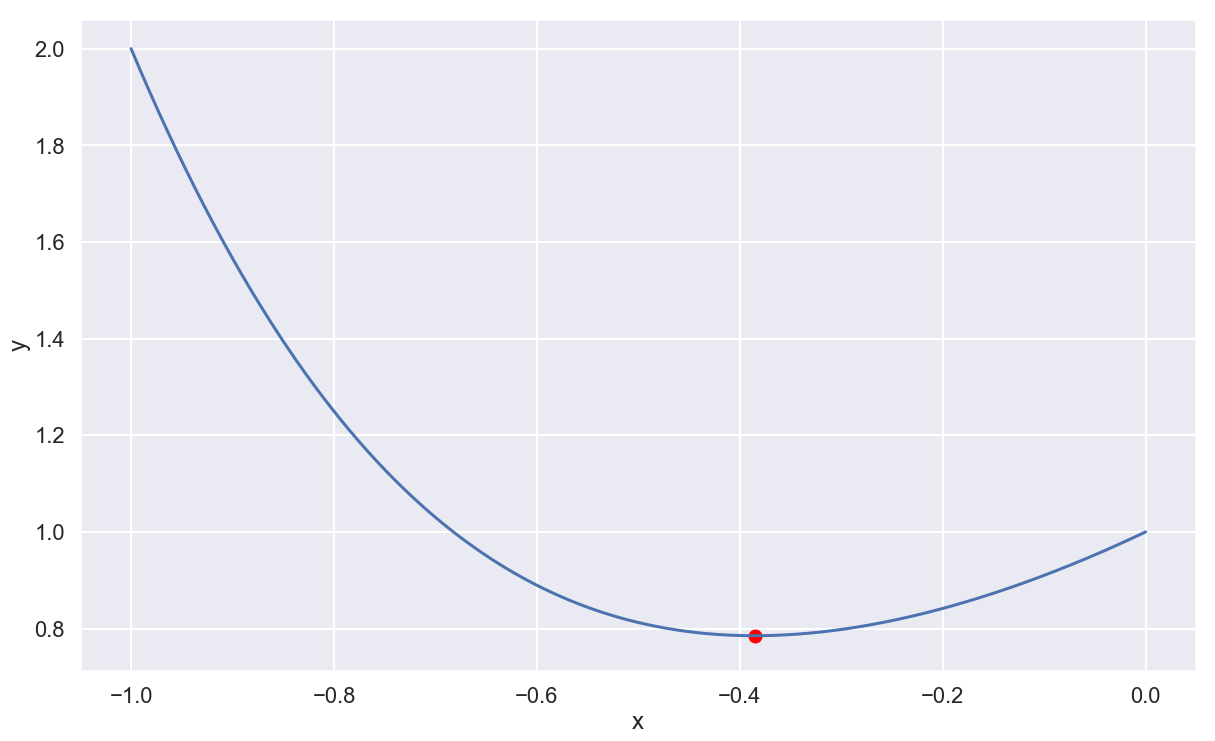

In [90]:
def iteration_midpoint(f,a,b,der=cf,n=0):
    x = (a + b)/2
    df = der(f,x)
    
    if df > 0:
        b = x
    else:
        a = x
        
    return x,df,a,b,n+1
    

def midpoint(f,bounds,eps=0.001,n=0,der=cf):
    a,b = bounds
    
    df = 1
    x = (a+b)/2
    
    while not np.abs(df) < eps:
        x,df,a,b,n = iteration_midpoint(f,a,b,der=der,n=n)
        
    return x,f(x),n

test_func(midpoint)
    

#### Метод хорд

-0.38545 0.78519 22


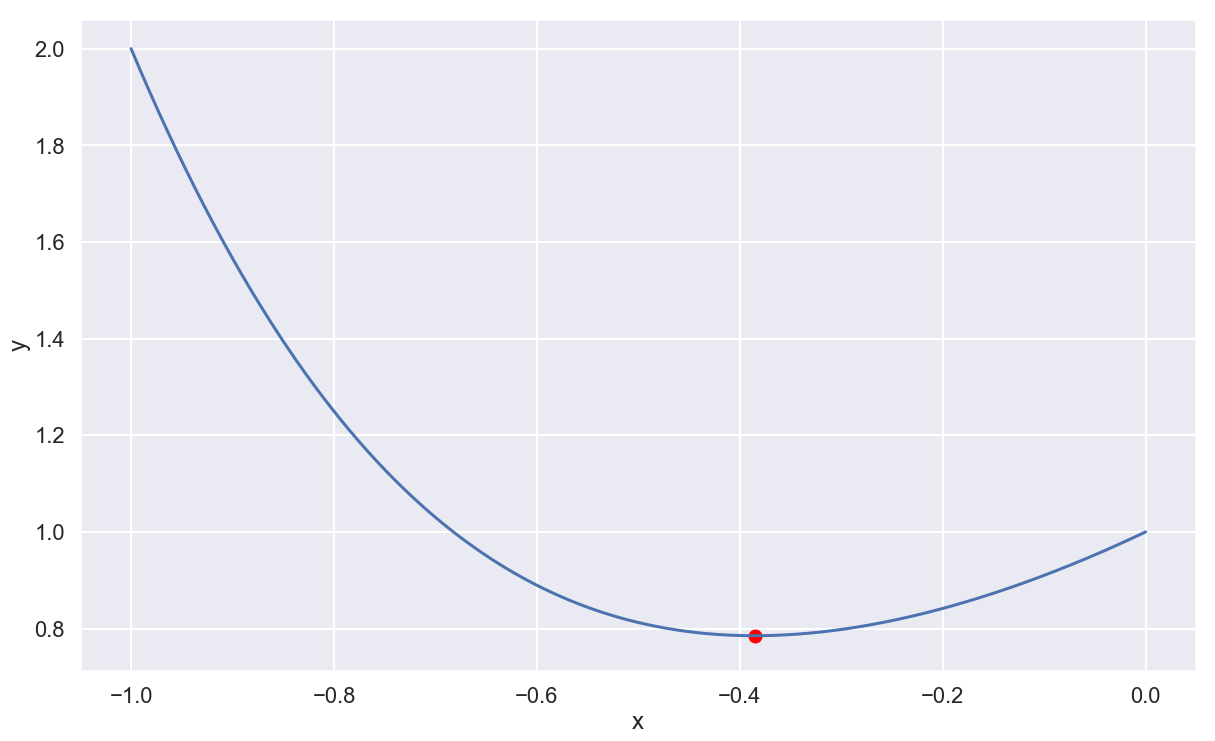

In [91]:
def iteration_chord(f,a,b,da,db,der=cf,n=0):
    x = a - da/(da - db)*(a-b)
    
    df = der(f,x)
    
    if df > 0:
        b = x
        db = df
    else:
        a = x
        da = df
        
    return x,df,a,b,da,db,n+1
    
def chord(f,bounds,eps=0.001,der=cf,n=0):
    a,b = bounds
    
    da = der(f,a)
    db = der(f,b)
    
    n = 2
    
    df = 1
    x = 0
    
    while not np.abs(df) < eps:
        x,df,a,b,da,db,n = iteration_chord(f,a,b,da,db,der=der,n=n)
    
    return x,f(x),n

test_func(chord)

#### Метод Ньютона


-0.38545 0.78519 10


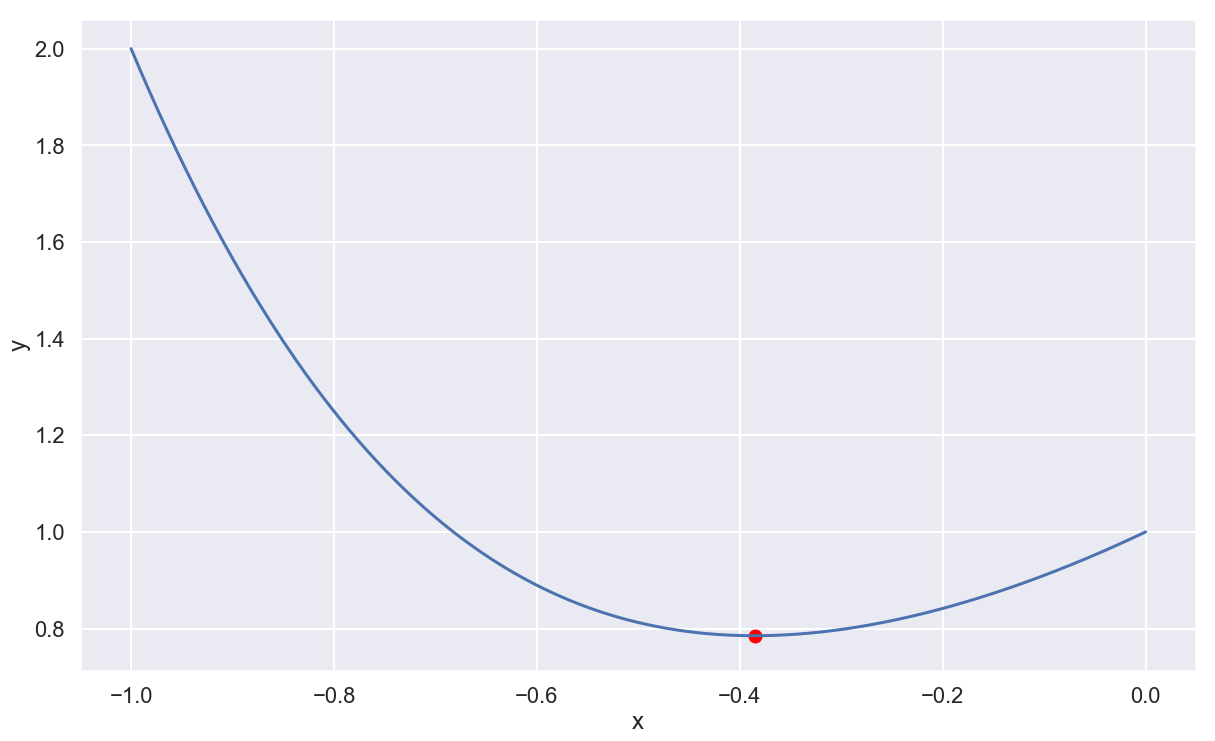

In [92]:
def newton(f,bounds,x0=0,eps=0.001,der=cf,der2=cff,n=0):
 
    df = 1
    
    while not np.abs(df) < eps:
        
        df = der(f,x0)
        dff = der2(f,x0)
        x0 -=df/dff
        n += 2
        
    return x0,f(x0),n

test_func(newton,args={'x0':0})

##### Задание №3 №4

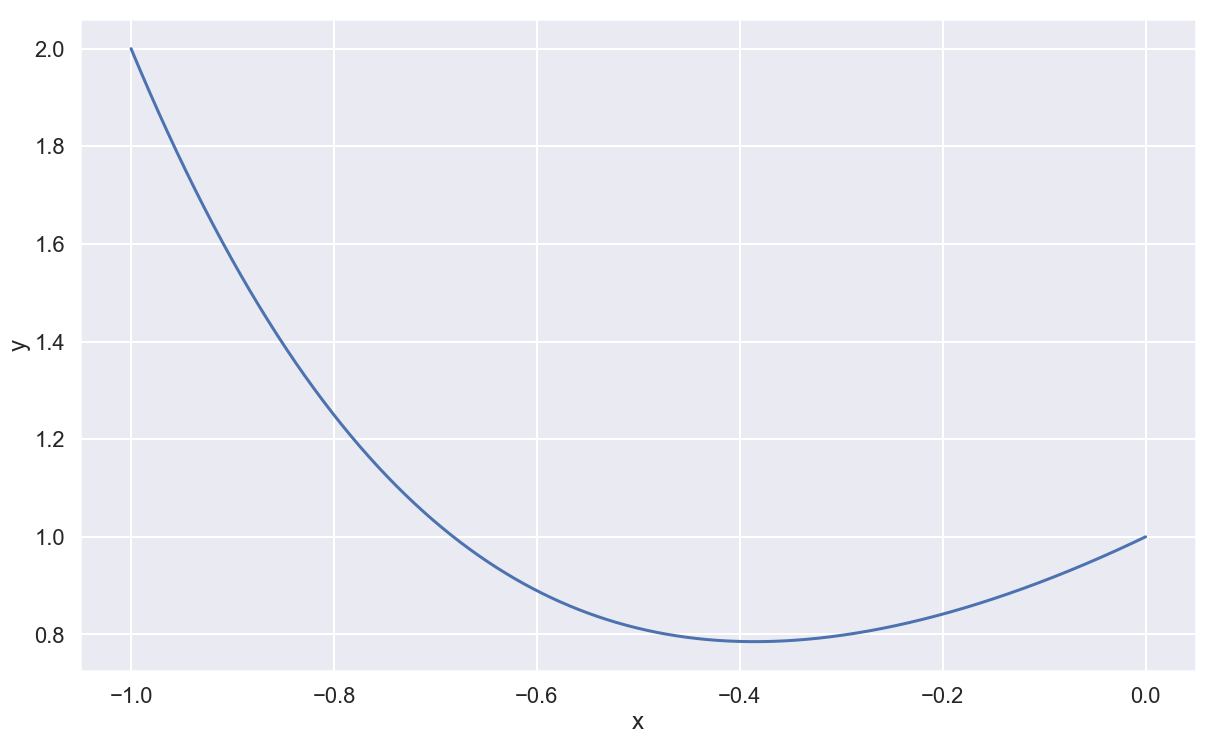

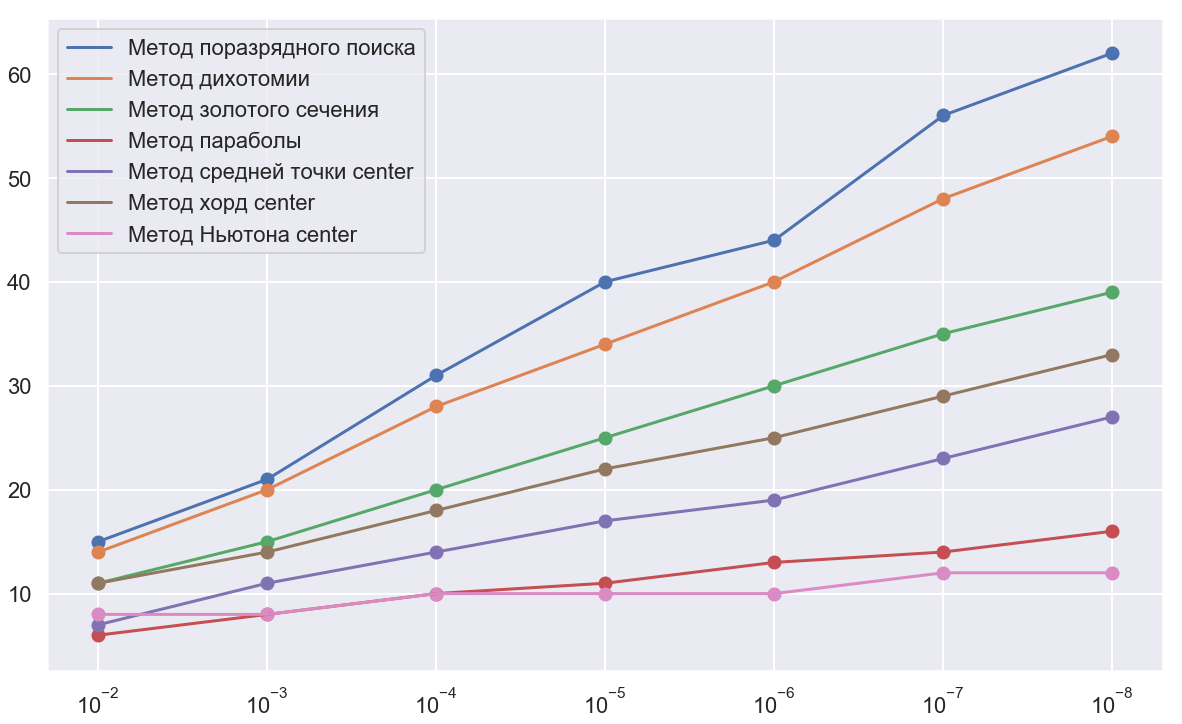

In [99]:
def test_func_for_all(number_function=2,eps=None):
    if eps == None:
        eps = [10**(-i) for i in range(2,9)]
    if type(eps) != list:
        eps = [eps]
    f,bounds = select_function(number_function)
    a,b = bounds
    
    # график функции
    
    x = np.linspace(a,b,1000)
    y = f(x)
    
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('x')
    plt.ylabel('y')
    
    
    # cравнение методов
    
    methods = [(bust,{},'Метод перебора'),
               (striking_search,{},'Метод поразрядного поиска'),
               (dichotomy,{},'Метод дихотомии'),
               (golden_section,{},'Метод золотого сечения'),
               (parabola,{},'Метод параболы'),
               (midpoint,{'der':cf},'Метод средней точки center'),
               #(midpoint,{'der':rf},'Метод средней точки right'),
               #(midpoint,{'der':lf},'Метод средней точки left'),
               (chord,{'der':cf},'Метод хорд center'),
               #(chord,{'der':rf},'Метод хорд right'),
               #(chord,{'der':lf},'Метод хорд left'),
               (newton,{'x0':0,'der':cf},'Метод Ньютона center'),
               #(newton,{'x0':0,'der':rf},'Метод Ньютона right'),
               #(newton,{'x0':0,'der':lf},'Метод Ньютона left'),
              ]
    
    plt.figure()
    
    for i,(method,params,method_name) in enumerate(methods[1:]):
        test_method = []
        for e in eps:
            params['eps'] = e
            _,_,n = method(f,bounds,**params)
            test_method.append(n)
            
        plt.plot(eps,test_method,label=method_name)
        plt.scatter(eps,test_method)
        
    plt.gca().invert_xaxis()
    plt.legend(loc='upper left')
    plt.xscale('log')
    
test_func_for_all(number_function=2)
    

##### Задание №5

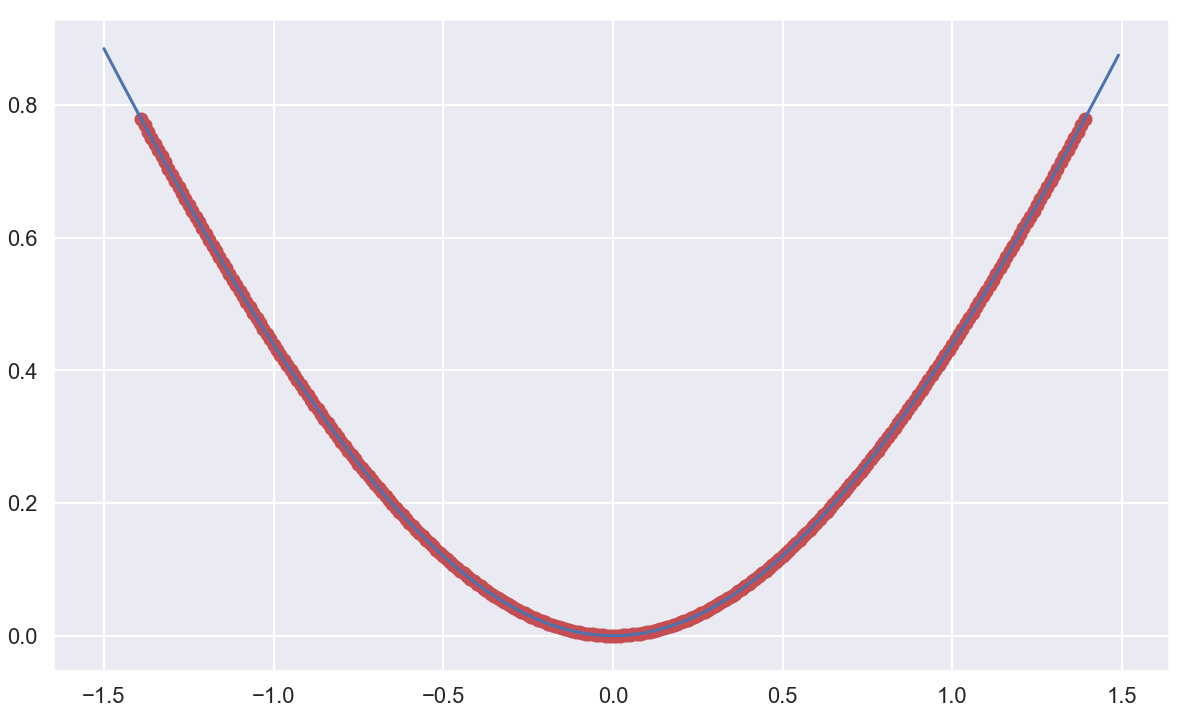

In [76]:
def newton2(f,x0=0,eps=0.001,der=cf,der2=cff,n=0):
 
    df = 1
    old = df
    
    while not np.abs(df) < eps:
        
        df = der(f,x0)
        dff = der2(f,x0)
        x0 -=df/dff
        if n > 0 and np.abs(df) > old:
            return 0,0,0
        n += 2
        old = np.abs(df)
        
    return x0,f(x0),n


f = lambda x: x*np.arctan(x) - np.log(1+x**2)/2

a = -1.5
b = 1.5
x = np.arange(a,b,0.01)
y = f(x)
plt.plot(x,y)

ma = b
mb = a
# определение диапазона нач. значений (численно)
for i in x:
    x,y,n = newton2(f,eps=10**-4,x0=i)
    if n > 0:
        if i < ma:
            ma = i
        if i > mb:
            mb = i
            
            
def test_newton2(f,x0=0,eps=10**-4):
    x,y,n = newton2(f,eps=eps,x0=x0)
    if n > 0:
        plt.scatter(x0,f(x0),color='r')
    
x = np.arange(a,b,0.01)
for i in x:
    test_newton2(f,x0=i)
    

In [79]:
# тест
# диапазон начальных значений для которых метод ньютона сходится
print(ma,mb)
print(newton2(f,x0=ma+0.01))
print(newton2(f,x0=ma-0.01))
print(newton2(f,x0=mb+0.01))
print(newton2(f,x0=mb-0.01))

-1.39 1.3900000000000023
(2.0273348646550338e-11, 4.110086653445844e-22, 16)
(0, 0, 0)
(0, 0, 0)
(-2.0256161250295848e-11, 4.1031206859798706e-22, 16)


-0.0008418495078983433

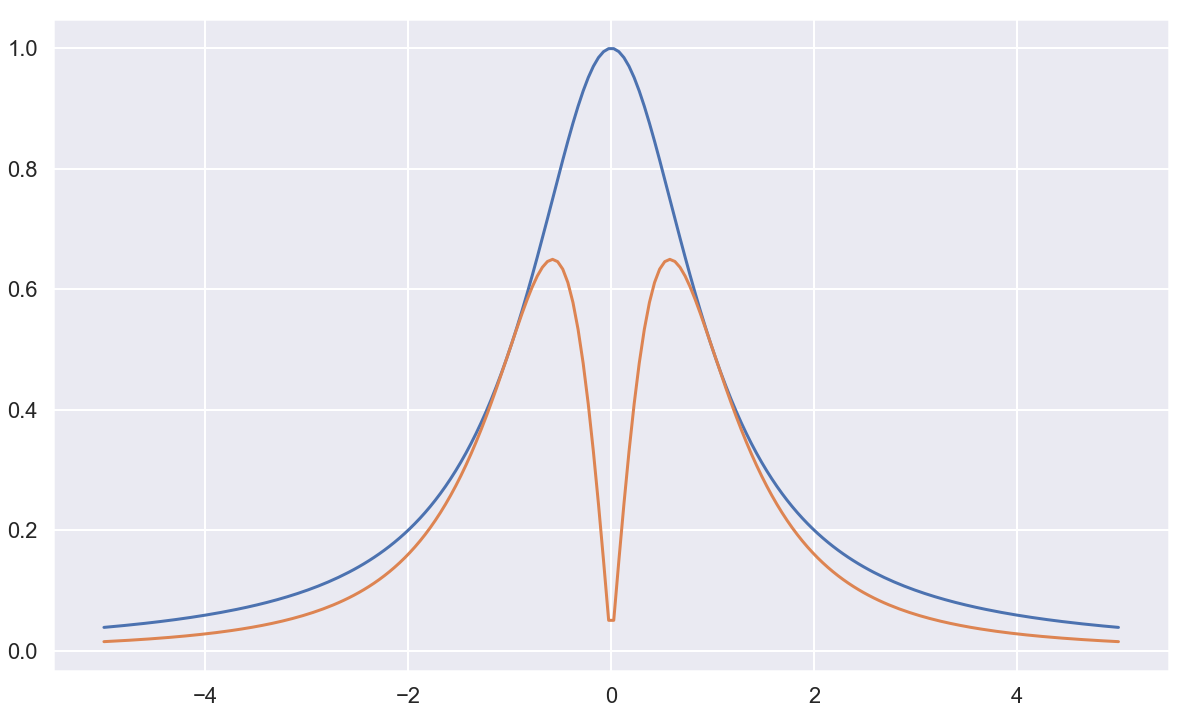

In [191]:
# вычисление диапазона нач. значений (по формуле)
from sympy import diff, symbols, atan, log
from scipy.optimize import minimize

x = symbols('x')
f = lambda x: x*np.arctan(x) - np.log(1+x**2)/2
fun = x*atan(x) - log(1+x**2)/2

f2 = diff(fun,x,2)
f3 = diff(fun,x,3)

g2 = lambda x : np.abs(f2.subs({'x':x}))
g3 = lambda x : -np.abs(f3.subs({'x':x}))


M3 = minimize(g3,0).fun
m2 = minimize(g2,1).fun

x_min = minimize(f,0).x

x = np.linspace(-5,5,200)
y = []
for i in x:
    y.append(g2(i))
plt.plot(x,y)

y2 = []
for i in x:
    y2.append(-g3(i))
plt.plot(x,y2)

2*m2/M3

In [ ]:
def cfff(f,x,h=0.001):
    return (f(x+h) - f(x) - cf(x)*h - cff(x)*h*h/2)*6/h/h/h

def newton(f,bounds,x0=0,eps=0.001,der=cf,der2=cff,n=0):
 
    M3 = 
    df = 1
    
    while not np.abs(df) < eps:
        
        df = der(f,x0)
        dff = der2(f,x0)
        x0 -=df/dff
        n += 2
        
    return x0,f(x0),n

test_func(newton,args={'x0':0})